In [1]:
# studying: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(0)

# load iris dataset
iris = datasets.load_iris()

# create pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["target label"] = df["target"].apply(lambda x: iris.target_names[x])

# check
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target label
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


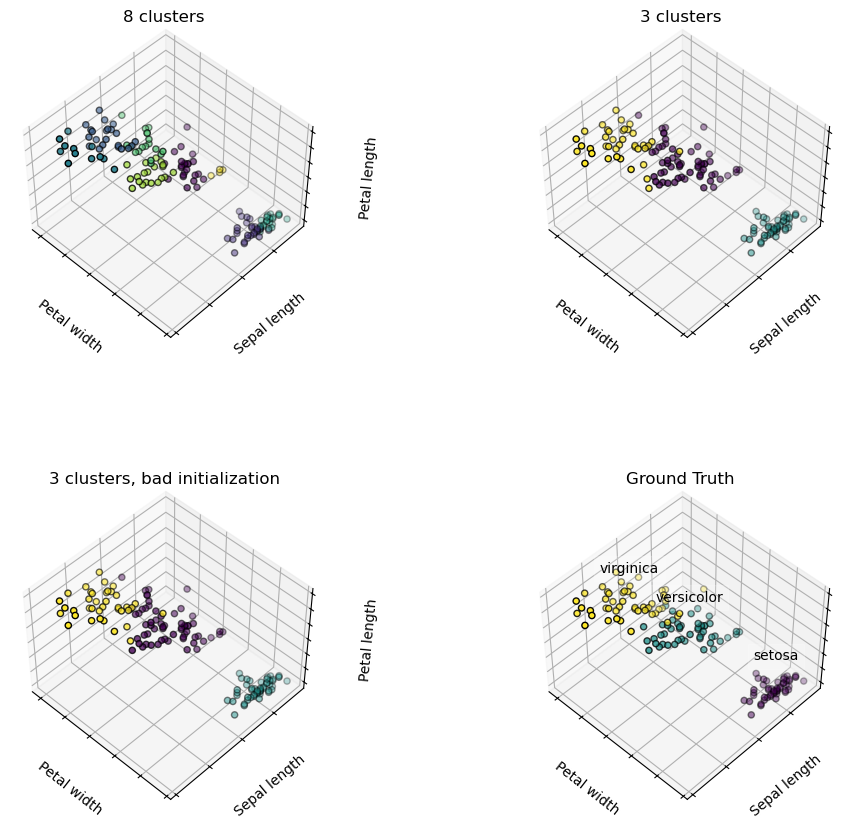

In [2]:
estimators = [
    ("k_mean_iris_8", KMeans(n_clusters=8)),
    ("k_mean_iris_8", KMeans(n_clusters=3)),
    (
        "k_mean_iris_bad_init",
        KMeans(
            n_clusters=3,
            n_init=1,
            init="random",
        ),
    ),
]

# plot clusters
fig = plt.figure(figsize=(12, 10))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(df.iloc[:, 0:4].values)

    labels = est.labels_
    ax.scatter(
        df.loc[:, "petal width (cm)"],
        df.loc[:, "sepal length (cm)"],
        df.loc[:, "petal length (cm)"],
        c=labels.astype(float),
        edgecolors="k",
    )

    # set ticklables to none
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

    # set other labels and titles
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

# add labels
for label in df["target label"].unique():
    ax.text3D(
        df[df["target label"] == label]["petal width (cm)"].mean(),
        df[df["target label"] == label]["sepal length (cm)"].mean(),
        df[df["target label"] == label]["petal length (cm)"].mean() + 2,
        label,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(
    df.loc[:, "petal width (cm)"],
    df.loc[:, "sepal length (cm)"],
    df.loc[:, "petal length (cm)"],
    c=df.loc[:, "target"],
    edgecolors="k",
)

# set ticklables to none
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# set other labels and titles
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.5)
plt.show()